# Тестовое задание

(выполнила Калугина Мария Николаевна) 

В данном задании необходимо написать код, который считает следующие признаки для каждого клиента `user_id`:

1. `events_ordinal_number` - порядковый номер события
2. `second_event_time` - время второго события
2.	`loan_ordinal_number` - порядковый номер займа
2.	`events_time_diff` - разница во времени между событиями
2.	`previous_loans_max_amount` - максимальная сумма предыдущего займа.


### Подготовка датафрейма

In [48]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# input
DATASET_PATH = 'test_Feb22.csv'

In [50]:
df = pd.read_csv(DATASET_PATH).reset_index(drop = True)
df.head(100)

,Unnamed: 0,time,user_id,type,amount,target,feature1,feature2,events_ordinal_number,second_event_time,loan_ordinal_number,events_time_diff,previous_loans_max_amount
0,0,2001-01-01 00:00:00,114,loanRequest,14651,NaN,1,1,1,2001-01-25 05:00:00,1,NaN,NaN
1,1,2001-01-01 01:00:00,199,loanRequest,13398,NaN,0,0,1,2001-01-08 01:00:00,1,NaN,NaN
2,2,2001-01-01 02:00:00,717,loanRequest,14525,NaN,0,0,1,2001-01-09 16:00:00,1,NaN,NaN
3,3,2001-01-01 03:00:00,66,loan,14437,1.0,1,1,1,2001-03-27 17:00:00,1,NaN,NaN
4,4,2001-01-01 04:00:00,584,loanRequest,15861,NaN,1,0,1,2001-01-05 10:00:00,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2001-01-04 23:00:00,515,loanRequest,15036,NaN,1,1,1,2001-05-17 13:00:00,1,NaN,NaN
96,96,2001-01-05 00:00:00,619,loanRequest,14304,NaN,1,0,1,2001-01-13 19:00:00,1,NaN,NaN
97,97,2001-01-05 01:00:00,477,loanRequest,14015,NaN,0,0,1,2001-02-27 10:00:00,1,NaN,NaN
98,98,2001-01-05 02:00:00,523,loanRequest,15631,NaN,1,1,1,2001-01-13 02:00:00,1,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   time                       10000 non-null  object 
 2   user_id                    10000 non-null  int64  
 3   type                       10000 non-null  object 
 4   amount                     10000 non-null  int64  
 5   target                     2019 non-null   float64
 6   feature1                   10000 non-null  int64  
 7   feature2                   10000 non-null  int64  
 8   events_ordinal_number      10000 non-null  int64  
 9   second_event_time          9999 non-null   object 
 10  loan_ordinal_number        10000 non-null  int64  
 11  events_time_diff           9000 non-null   object 
 12  previous_loans_max_amount  5642 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage

In [52]:
df['type'].value_counts()

loanRequest    7981
loan           2019
Name: type, dtype: int64

### Оценка признака "feature1" в разрезе целевой переменной

In [53]:
TARGET_NAME = 'target'

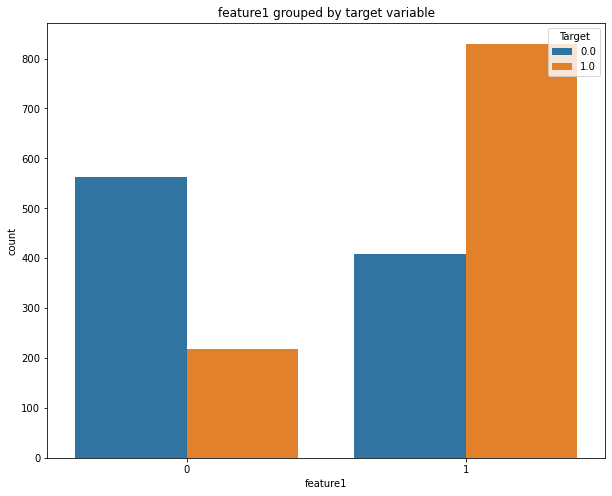

In [54]:
plt.figure(figsize=(10, 8))

sns.countplot(x="feature1", hue=TARGET_NAME, data=df)
plt.title('feature1 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Визуально мы видим, как будто значение feature1 действительно влияет на значение целевой переменной.
Но для этого нужно проверить эту гипотезу

* Нулевая гипотеза: feature1 не влияет на целевую переменную (средние значения feature1 для выборки, где target = 1 и для выборки с target=0 равны)
* Альтернативная гипотеза: наблюдаемое влияние выходит за рамки случайных колебаний, наблюдения статистически значимы - feature1 влияет на целевую переменную (средние значения двух выборок не равны)
* Критерий: Манна Уитни
* Уровень значимости $\normalsize \alpha$: 0.05



In [55]:
feature1_with_target = df[['feature1', TARGET_NAME]]
feature1_1 = feature1_with_target['feature1']
feature1_with_target_0 = feature1_1[feature1_with_target[TARGET_NAME] == 0]
feature1_with_target_1 = feature1_1[feature1_with_target[TARGET_NAME] == 1]


In [56]:
from scipy.stats import mannwhitneyu


In [57]:
mannwhitneyu(feature1_with_target_0, feature1_with_target_1)  

MannwhitneyuResult(statistic=320155.0, pvalue=8.639964321056884e-66)

pvalue < $\normalsize \alpha$ - что нулевая гипотеза H0 отвергается, и принимается альтернативная H1. -

#### feature1 влияет на целевую переменную




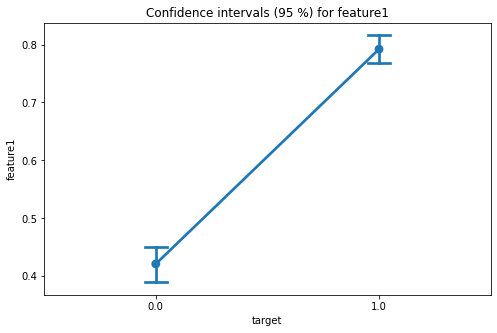

In [58]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='feature1', data=feature1_with_target, capsize=.1)

plt.title(f'Confidence intervals (95 %) for feature1')
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

### Оценка признака "feature2" в разрезе целевой переменной

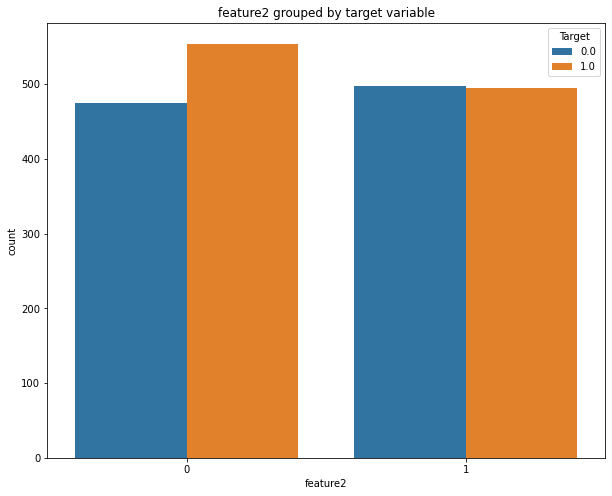

In [59]:
plt.figure(figsize=(10, 8))

sns.countplot(x="feature2", hue=TARGET_NAME, data=df)
plt.title('feature2 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

* Нулевая гипотеза H0: feature2 не влияет на целевую переменную (средние значения feature2 для выборки, где target = 1 и для выборки с target=0 равны)
* Альтернативная гипотеза H1: наблюдаемое влияние выходит за рамки случайных колебаний, наблюдения статистически значимы (средние значения 2х выборок не равны)
* Критерий: Манна Уитни
* Уровень значимости $\normalsize \alpha$: 0.05




In [60]:
feature2_with_target = df[['feature2', TARGET_NAME]]
feature2_1 = feature2_with_target['feature2']
feature2_with_target_0 = feature2_1[feature2_with_target[TARGET_NAME] == 0]
feature2_with_target_1 = feature2_1[feature2_with_target[TARGET_NAME] == 1]



In [61]:
mannwhitneyu(feature2_with_target_0, feature2_with_target_1)  

MannwhitneyuResult(statistic=488213.0, pvalue=0.03461531522412534)

pvalue < $\normalsize \alpha$ - что нулевая гипотеза H0 отвергается, и принимается альтернативная H1: 
feature2  влияет на целевую переменную.
Но по уровню p-value видно, что это влияние намного меньше, чем у feature1.
Если сделать a=0.03 - то нулевая гипотеза будет принята.


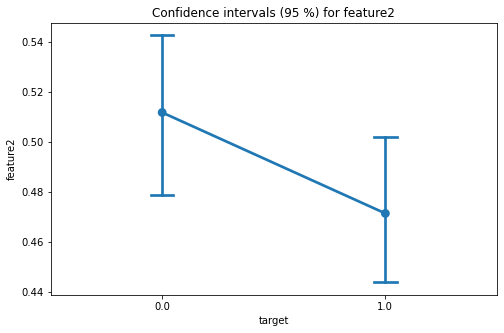

In [62]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='feature2', data=feature2_with_target, capsize=.1)

plt.title(f'Confidence intervals (95 %) for feature2')
plt.show()

Видим, что мат. ожидания двух выборок не равны, но
доверительные интервалы сильно пересекаются.

### Расчет признаков

#### Признак `events_ordinal_number`

In [63]:
# весь код расчета признака должен быть в этом методе
def calculate_events_number(df):
    #метод получает номер текущей записи (с id - current_item ) для пользователя с user_id = current_user
    def get_events_number(current_user, current_item, df):
        
        #получаем датасет со всеми записям для текущего пользователя 
        cur_df = df[df["user_id"]==current_user].sort_values('time').reset_index(drop = True)
        
        # находим номер строки данной записи среди всех записей для текущего пользователя
        index = cur_df.loc[cur_df['Unnamed: 0']==current_item].index[0] 
        return 1+index
    
    df['events_ordinal_number'] = df.apply(lambda x: get_events_number(x['user_id'], x['Unnamed: 0'], df), axis = 1 )
    
    return df

In [64]:
df = calculate_events_number(df)

In [65]:
df.shape

(10000, 13)

In [66]:
df.loc[df['user_id']==558].head(10)

,Unnamed: 0,time,user_id,type,amount,target,feature1,feature2,events_ordinal_number,second_event_time,loan_ordinal_number,events_time_diff,previous_loans_max_amount
683,683,2001-01-29 11:00:00,558,loanRequest,14006,NaN,1,0,1,2001-02-11 10:00:00,1,NaN,NaN
994,994,2001-02-11 10:00:00,558,loanRequest,15838,NaN,0,1,2,2001-02-11 10:00:00,1,12 days 23:00:00,NaN
1755,1755,2001-03-15 03:00:00,558,loan,13401,1.0,1,0,3,2001-02-11 10:00:00,1,31 days 17:00:00,NaN
2688,2688,2001-04-23 00:00:00,558,loanRequest,15555,NaN,0,0,4,2001-02-11 10:00:00,2,38 days 21:00:00,13401.0
2821,2821,2001-04-28 13:00:00,558,loanRequest,14399,NaN,0,1,5,2001-02-11 10:00:00,2,5 days 13:00:00,13401.0
2971,2971,2001-05-04 19:00:00,558,loanRequest,14467,NaN,1,1,6,2001-02-11 10:00:00,2,6 days 06:00:00,13401.0
4339,4339,2001-06-30 19:00:00,558,loan,14703,1.0,1,0,7,2001-02-11 10:00:00,2,57 days 00:00:00,13401.0
4557,4557,2001-07-09 21:00:00,558,loanRequest,12555,NaN,1,1,8,2001-02-11 10:00:00,3,9 days 02:00:00,14703.0
5180,5180,2001-08-04 20:00:00,558,loanRequest,14292,NaN,0,0,9,2001-02-11 10:00:00,3,25 days 23:00:00,14703.0
6352,6352,2001-09-22 16:00:00,558,loanRequest,16033,NaN,1,1,10,2001-02-11 10:00:00,3,48 days 20:00:00,14703.0


#### Признак `second_event_time`

In [67]:
# весь код расчета признака должен быть в этом методе
def calculate_second_event_time(df):
    
    #метод получает время второго события для пользователя с user_id = current_user_id
    def get_second_event_time(current_user_id, df):
        
        #получаем датасет со всеми заявками текущего пользователя 
        cur_df = df[df["user_id"]==current_user_id].sort_values('time').reset_index(drop = True)
        
        if (cur_df.shape[0]>1):
             #если в этом датасете больше одной записи, то берем время второй записи
             second_time = cur_df['time'].iloc[1]
        else:
             #если нет - то передаем Nan
             second_time = np.nan
        return second_time
    
    df['new_second_time'] = df.apply(lambda x: get_second_event_time(x['user_id'], df), axis = 1 )
    
    return df

In [68]:
df = calculate_second_event_time(df)


In [69]:
df.loc[df['user_id']==558].head(10)

,Unnamed: 0,time,user_id,type,amount,target,feature1,feature2,events_ordinal_number,second_event_time,loan_ordinal_number,events_time_diff,previous_loans_max_amount,new_second_time
683,683,2001-01-29 11:00:00,558,loanRequest,14006,NaN,1,0,1,2001-02-11 10:00:00,1,NaN,NaN,2001-02-11 10:00:00
994,994,2001-02-11 10:00:00,558,loanRequest,15838,NaN,0,1,2,2001-02-11 10:00:00,1,12 days 23:00:00,NaN,2001-02-11 10:00:00
1755,1755,2001-03-15 03:00:00,558,loan,13401,1.0,1,0,3,2001-02-11 10:00:00,1,31 days 17:00:00,NaN,2001-02-11 10:00:00
2688,2688,2001-04-23 00:00:00,558,loanRequest,15555,NaN,0,0,4,2001-02-11 10:00:00,2,38 days 21:00:00,13401.0,2001-02-11 10:00:00
2821,2821,2001-04-28 13:00:00,558,loanRequest,14399,NaN,0,1,5,2001-02-11 10:00:00,2,5 days 13:00:00,13401.0,2001-02-11 10:00:00
2971,2971,2001-05-04 19:00:00,558,loanRequest,14467,NaN,1,1,6,2001-02-11 10:00:00,2,6 days 06:00:00,13401.0,2001-02-11 10:00:00
4339,4339,2001-06-30 19:00:00,558,loan,14703,1.0,1,0,7,2001-02-11 10:00:00,2,57 days 00:00:00,13401.0,2001-02-11 10:00:00
4557,4557,2001-07-09 21:00:00,558,loanRequest,12555,NaN,1,1,8,2001-02-11 10:00:00,3,9 days 02:00:00,14703.0,2001-02-11 10:00:00
5180,5180,2001-08-04 20:00:00,558,loanRequest,14292,NaN,0,0,9,2001-02-11 10:00:00,3,25 days 23:00:00,14703.0,2001-02-11 10:00:00
6352,6352,2001-09-22 16:00:00,558,loanRequest,16033,NaN,1,1,10,2001-02-11 10:00:00,3,48 days 20:00:00,14703.0,2001-02-11 10:00:00


#### Признак `loan_ordinal_number`

In [70]:

# весь код расчета признака должен быть в этом методе
def calculate_loan_number(df):
    
    #метод загружает все займы текущего пользователя
    def get_loans(user_id, df):
        loan_df =  df.loc[(df['user_id'] == user_id) & (df['type'] == 'loan')] 
        return loan_df

    #метод получает loan_number для записи по ее индексу user_id
    def get_current_loan_number(current_user_id, current_index, df_1):
    
        #получаем датасет, соответствующий всем заявкам текущего пользователя
        cur_df = df_1[df_1["user_id"]==current_user_id].sort_values('time').reset_index(drop = True)

        # получаем список всех займов для текущего пользователя
        loan_df = get_loans(current_user_id, df_1)

        current_time = cur_df.loc[cur_df['Unnamed: 0']==current_index]['time'].reset_index(drop = True)[0]

        ### обрабатываем дату
        current_time= pd.to_datetime(current_time, format='%Y-%m-%d %H:%M:%S')
        loan_number = 1
        
        #теперь для каждой заявки текущего пользователя
        for index, row in loan_df.iterrows():
            
            #загружаем время займа
            loan_time = pd.to_datetime(row['time'], format='%Y-%m-%d %H:%M:%S')
            if (loan_time < current_time):
                loan_number +=1
            else:
                if (loan_time == current_time):                
                    break

        return loan_number


    df['loan_ordinal_number'] = df.apply(lambda x: get_current_loan_number(x['user_id'], x['Unnamed: 0'], df), axis = 1)
    
    return df

In [71]:
df = calculate_loan_number(df)

#### Признак `events_time_diff`

In [72]:
# весь код расчета признака должен быть в этом методе
def calculate_time_diff(df):
    
    #метод получает разницу во времени для текущей записи 
    def get_events_time_diff(current_user_id, current_index, df_1):
    
        #получаем датасет, соответствующий всем заявкам текущего пользователя
        cur_df = df[df["user_id"]==current_user_id].sort_values('time').reset_index(drop = True)
        
        #получаем время текущей записи
        current_time = cur_df.loc[cur_df['Unnamed: 0']==current_index]['time'].reset_index(drop = True)[0]
        
        #конвертируем его в формат даты
        current_time= pd.to_datetime(current_time, format='%Y-%m-%d %H:%M:%S')
        
        #номер строки, соответствующий текущей записи, среди всех записей текущего пользователя
        index = cur_df.loc[cur_df['Unnamed: 0']==current_index].index.values[0]

        #если эта запись первая для текущего пользователя, то возвращаем Nan
        if (index ==0) | (index ==np.nan):
            return  np.nan
        
        #если не первая
        else: 
            #получаем время предыдущей записи для текущего пользователя
            previous_time = cur_df.iloc[index-1]['time']
            previous_time = pd.to_datetime(previous_time, format='%Y-%m-%d %H:%M:%S')
        
            #вычисляем разницу во времени
            time_diff = current_time - previous_time
            
            return str(time_diff)
        
        
    

    df['events_time_diff'] = df.apply(lambda x: get_events_time_diff(x['user_id'], x['Unnamed: 0'], df), axis = 1)

    return df

In [73]:
df = calculate_time_diff(df)


#### Признак `previous_loans_max_amount`

In [74]:
# весь код расчета признака должен быть в этом методе
def calculate_previous_max_amount(df):
    
    #метод загружает все займы текущего пользователя
    def get_loans(user_id, df):
        loan_df =  df.loc[(df['user_id'] == user_id) & (df['type'] == 'loan')] 
        return loan_df
    
    def get_previous_loans_max_amount(current_user_id, current_index, df):
        
        #получаем датасет, соответствующий всем заявкам текущего пользователя

        cur_df = df[df["user_id"]==current_user_id].sort_values('time').reset_index(drop = True)

        # получаем список всех займов для текущего пользователя
        loan_df = get_loans(current_user_id, df)

        current_time = cur_df.loc[cur_df['Unnamed: 0']==current_index]['time'].reset_index(drop = True)[0]

        # обрабатываем дату
        current_time= pd.to_datetime(current_time, format='%Y-%m-%d %H:%M:%S')
        
        #итоговая максимальная сумма предшествующей заявки
        result_loan_amount = 0
        
        #переменная-индикатор - нашлась ли предыдущая заявка для текущей записи. 
        # Она нужна для того, чтобы присвоить result_loan_amount np.Nan (если перед записью не было заявки)
        #по логике, можно было обойтись и без нее, и смотреть равен ли result_loan_amount 0, но ввела ее на случай
        #что в таблице будут выбросы, где у loan  amount= 0 
        
        loan_exists=False
        
        #для каждой строки в списке всех займов текущего пользователя
        for index, row in loan_df.iterrows():
            #берем дату займа
            loan_time = pd.to_datetime(row['time'], format='%Y-%m-%d %H:%M:%S')
            
            #если она меньше даты текущей записи
            if (loan_time < current_time):
                loan_exists=True
                #если промежуточная максимальная сумма меньше суммы этой заявки
                if (result_loan_amount < row['amount']):
                    
                    result_loan_amount = row['amount']

            else:
                break
        
        if (not loan_exists):
        
            return np.nan

        return result_loan_amount

    df['previous_loans_max_amount'] = df.apply(lambda x: get_previous_loans_max_amount(x['user_id'], x['Unnamed: 0'], df), axis = 1)

    return df

In [75]:
df = calculate_previous_max_amount(df)

### Сохранение итогового датасета с признаками

Этот код трогать не нужно.

In [76]:
def calculate_feature(df):
    calculate_events_number(df)
    calculate_second_event_time(df)
    calculate_loan_number(df)
    calculate_time_diff(df)
    calculate_previous_max_amount(df)

In [77]:
%%timeit -o 
calculate_feature(df)

10min 1s ± 1min 36s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 10min 1s ± 1min 36s per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [78]:
columns = ['time']
rez = _
df_time = pd.DataFrame([rez], None, columns)
df_time.to_csv('time.csv', index=False)

In [79]:
df.to_csv('test.csv', index=False)